# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv("C:\\Users\\Swathi\\Desktop\\Excelr Classes\\Assignments\\17.Neural Networks\\concrete.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Assuming:

strength value <=25 is  = 'Weak'

strength value > 25 is =  'Strong'


In [3]:
df.loc[df.strength <= 25,'strength']='Weak'
df.loc[df.strength != 'Weak','strength']='Strong'

In [4]:
Concrete=df
Concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,Strong
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,Weak
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,Strong
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,Strong
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,Weak
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,Weak
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,Strong
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,Strong
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,Strong


In [5]:
# Concrete.describe()

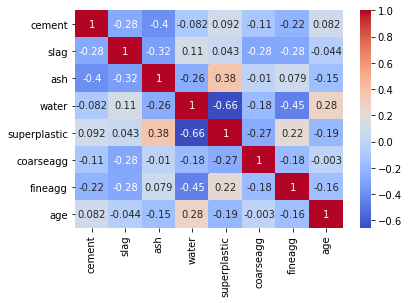

In [6]:
# #Correlation heatmap
corr = Concrete.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')

In [7]:
# boxplots for each independent variables 
# sns.boxplot(Concrete.cement)
# sns.boxplot(Concrete.slag)
# sns.boxplot(Concrete.ash)
# sns.boxplot(Concrete.water)
# sns.boxplot(Concrete.superplastic)
# sns.boxplot(Concrete.coarseagg)
# sns.boxplot(Concrete.fineagg)
# sns.boxplot(Concrete.age)
# sns.boxplot(Concrete.strength)

In [8]:
# sns.pairplot(Concrete)

In [9]:
Concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,Strong
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,Weak
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,Strong
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,Strong
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,Weak


# Define Normalize function

In [21]:
# Normalization function 
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

# Split dataframe into 'predictors' & 'target'

In [22]:
predictors = Concrete.iloc[:,0:8]
target = Concrete.iloc[:,8]

Apply Normalization function on predictors

In [24]:
predictors = norm_func(predictors)
predictors.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176


# Develop Model

In [13]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10), random_state=1)
clf.fit(predictors,target)

pred_values = clf.predict(predictors)
pred_values

C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array(['Strong', 'Weak', 'Strong', ..., 'Strong', 'Strong', 'Strong'],
      dtype='<U6')

# Analyse Model

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score = accuracy_score(target,pred_values)
accuracy_score

0.9427184466019417

In [16]:
print(confusion_matrix(target,pred_values))

[[707  28]
 [ 31 264]]


In [17]:
classification_report=classification_report(target,pred_values)
print(classification_report)

              precision    recall  f1-score   support

      Strong       0.96      0.96      0.96       735
        Weak       0.90      0.89      0.90       295

    accuracy                           0.94      1030
   macro avg       0.93      0.93      0.93      1030
weighted avg       0.94      0.94      0.94      1030



In [20]:
np.mean((target==pred_values)*100)  #94%

94.27184466019418